In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

from datetime import datetime
from collections import defaultdict
from math import gamma

In [2]:
#Create a directed graph
def create_G_n_m(n,a):
    G = nx.MultiDiGraph()
    G.add_node(0)
    G.add_edge(0, 0)
    Pr=[]
    Pr.append(a+1)
    while G.number_of_nodes() < n:
        input_node = G.number_of_nodes()#The point numbering starts from 0, and there is one point at this time. number is equal to 1, 1 can be used as the new node number.
        G.add_node(input_node)
        #The degree of the endpoint of i-1 is 1, deg(i-1)+a-1=a, so the numerator is a by default.
        Pr.append(a)
        Pr_norm = np.array(Pr) / ((a+1)*(input_node+1)-1)
        Select_node=np.random.choice(input_node+1, p = Pr_norm)#Randomly pick a connection
        #Each time the point is randomly selected, the degree +1
        Pr[Select_node] += 1
        G.add_edge(input_node, Select_node)
    return G

In [3]:
def Create_H(n, m, a):
    H = nx.MultiDiGraph()
    G_nm1 = create_G_n_m(n * m, a)
    for u, v in G_nm1.edges():
        u_new, v_new = u // m, v // m
        H.add_edge(u_new, v_new)
    return H

In [4]:
H=Create_H(5000, 2, 0.27)

In [5]:
print(H.number_of_nodes(), H.number_of_edges())

5000 10000


In [6]:
def beta(a,b):
    return gamma(a) * gamma(b) / gamma(a+b)
def beta_amd(a, m ,d):
    return beta(d-m+m*a, a+2) / beta(m*a, a+1)

In [7]:
n = 5000
a = 0.27
m = 2
degrees = defaultdict(int)

#Calculate the degree of a point
for v in H.nodes():
    d = H.degree(v)
    degrees[d] += 1

In [8]:
x = sorted(degrees.keys())
y = [degrees[d] for d in x]
x_1 = np.array(x)
x_1 = x_1[x_1 <=50]
y_1 = [beta_amd(a, m, d) * 5000 for d in x_1]

Text(0.5, 1.0, 'Power-law distribution of ordinary coordinates')

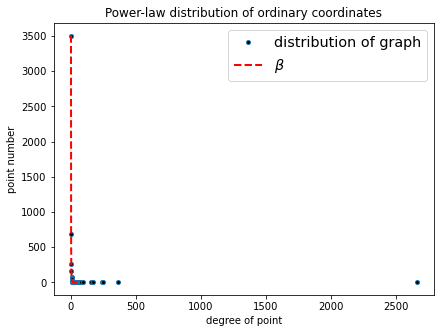

In [9]:
#normal coordinates
plt.figure(figsize=(15,5))
plt.subplot(122)
plt.plot(x, y, ls = 'None', marker = '.', markersize = 8, markerfacecolor = 'black', label = "distribution of graph")
plt.plot(x_1, y_1, 'r--',linewidth = 2, label = r"$\beta$")
plt.xlabel("degree of point")
plt.ylabel("point number")
plt.legend(fontsize = "x-large")
plt.title("Power-law distribution of ordinary coordinates")

Text(0.5, 1.0, 'Power-law distribution of ordinary coordinates (in log-scale)')

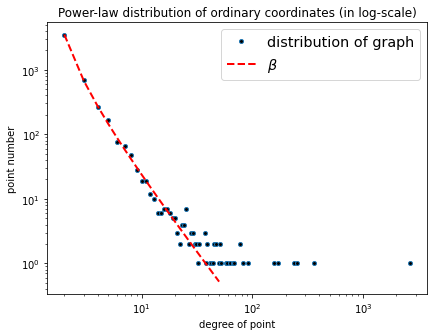

In [10]:
#logarithmic coordinates
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.loglog(x, y, ls = 'None', marker = '.', markersize = 8, markerfacecolor = 'black', label = "distribution of graph")
plt.loglog(x_1, y_1, 'r--',linewidth = 2, label = r"$\beta$")
plt.xlabel("degree of point")
plt.ylabel("point number")
plt.legend(fontsize = "x-large")
plt.title("Power-law distribution of ordinary coordinates (in log-scale)")

In [11]:
t_begin = datetime.now()
H_1 = Create_H(10000, 5, 0.27)
t_end = datetime.now() - t_begin
run_time = (t_end).seconds + (t_end).microseconds / 1e6

print("number of points: {}, number of edges: {}, time: {}".format(H_1.number_of_nodes(), H_1.number_of_edges(), run_time))

number of points: 10000, number of edges: 50000, time: 47.494144
